# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [28]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [27]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = ''
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

#SOLUCION 
#n = numero de nodos 
#d = profundidad 
#b = factor de ramificacion

n = 4  
d = 2
 
 
formula:  

4 =  (b^d+1)-1/(b-1) 

4 =  (b^3)-1/(b-1)  
    
1.Ahora debemos proceder a despejar b de la ecuacion anterior, en donde b al ser despejada es igual a:  
b = 1/2(sqrt(13)-1)  

b = 1.30 aproximadamente 
  
2.Al despejar b, ahora lo remplazamos en el ecuacion en donde quedaria de la siguiente manera
 
n = ((1/2(sqrt(13)-1))^3 -1)/((1/2(sqrt13-1)-1))   
  
3.Al realizar este calculo n es igual a 4
  
n = 4 
   

# Practica

1- Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

2- Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


3- Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

In [ ]:
1.Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

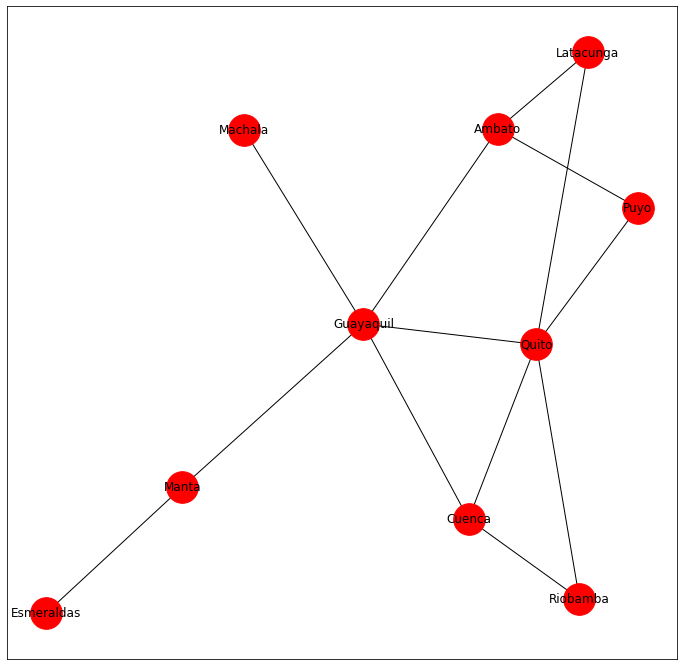

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
connections = {
    'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
    'Latacunga': {'Ambato', 'Quito'},
    'Manta': {'Guayaquil'},
    'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
    'Riobamba': {'Cuenca', 'Quito'},
    'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
    'Puyo': {'Ambato', 'Quito'},
    'Machala': {'Guayaquil'},
    'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}, 
    'Esmeraldas': {'Manta'}
}
Grafica = nx.Graph()  
Grafica.add_nodes_from(connections) 
for ciudad, listaCiudades in connections.items():
        for a in listaCiudades:  
            Grafica.add_edge(ciudad,a,size=250)

plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(Grafica, node_color = 'red', with_label = True, node_size=1000)
plt.show() 

2- Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

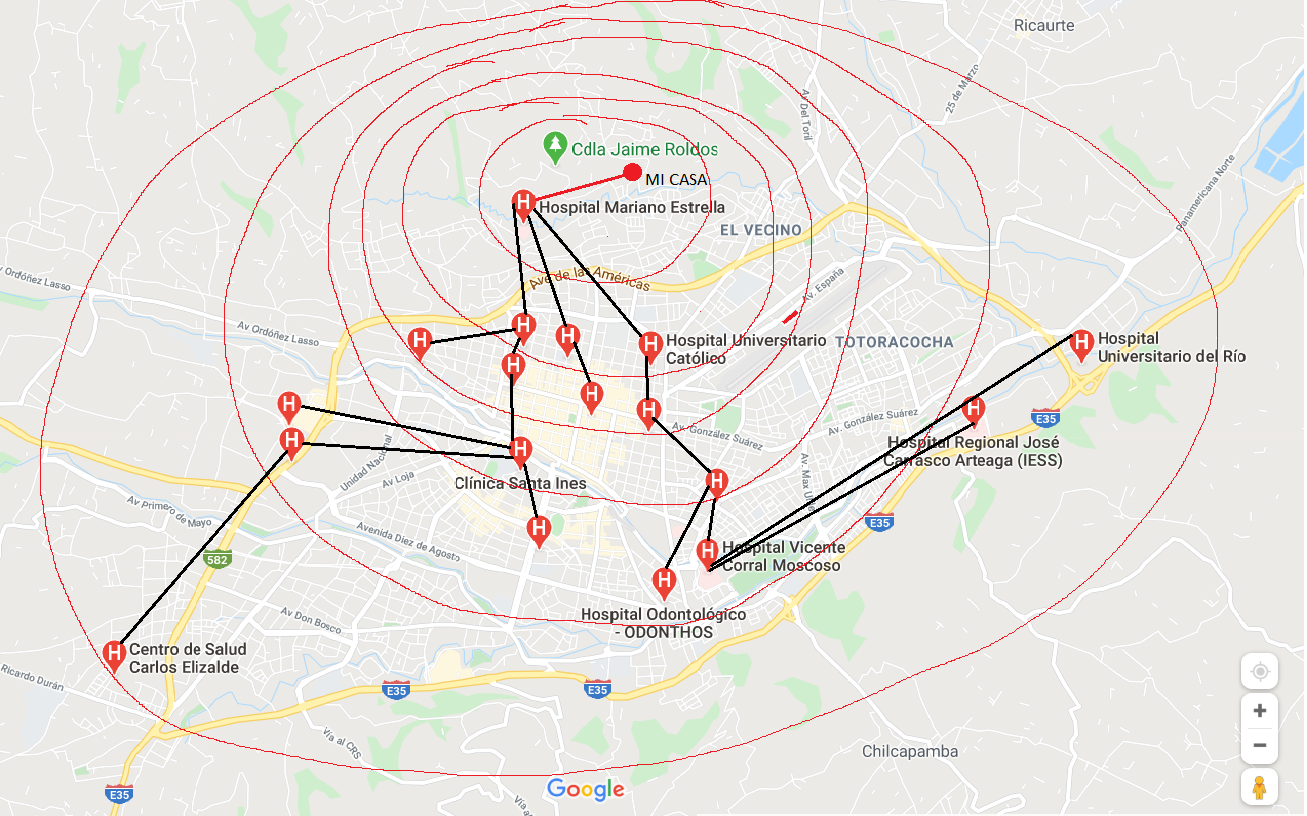

In [36]:
from IPython.display import Image 
Image(filename="hospitales.png")


In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

LA SOLUCION ES : 

['Micasa', 'HospitalMarianoEstrella', 'HospitalUniversitarioCatólico', 'CentroMedicoSanBlas', 'CentroDeSaludC-Materno-InfantilyEmergencias', 'HospitalVicenteCoralMoscoso', 'HospitalRegionalJoseCarrascoArteaga']


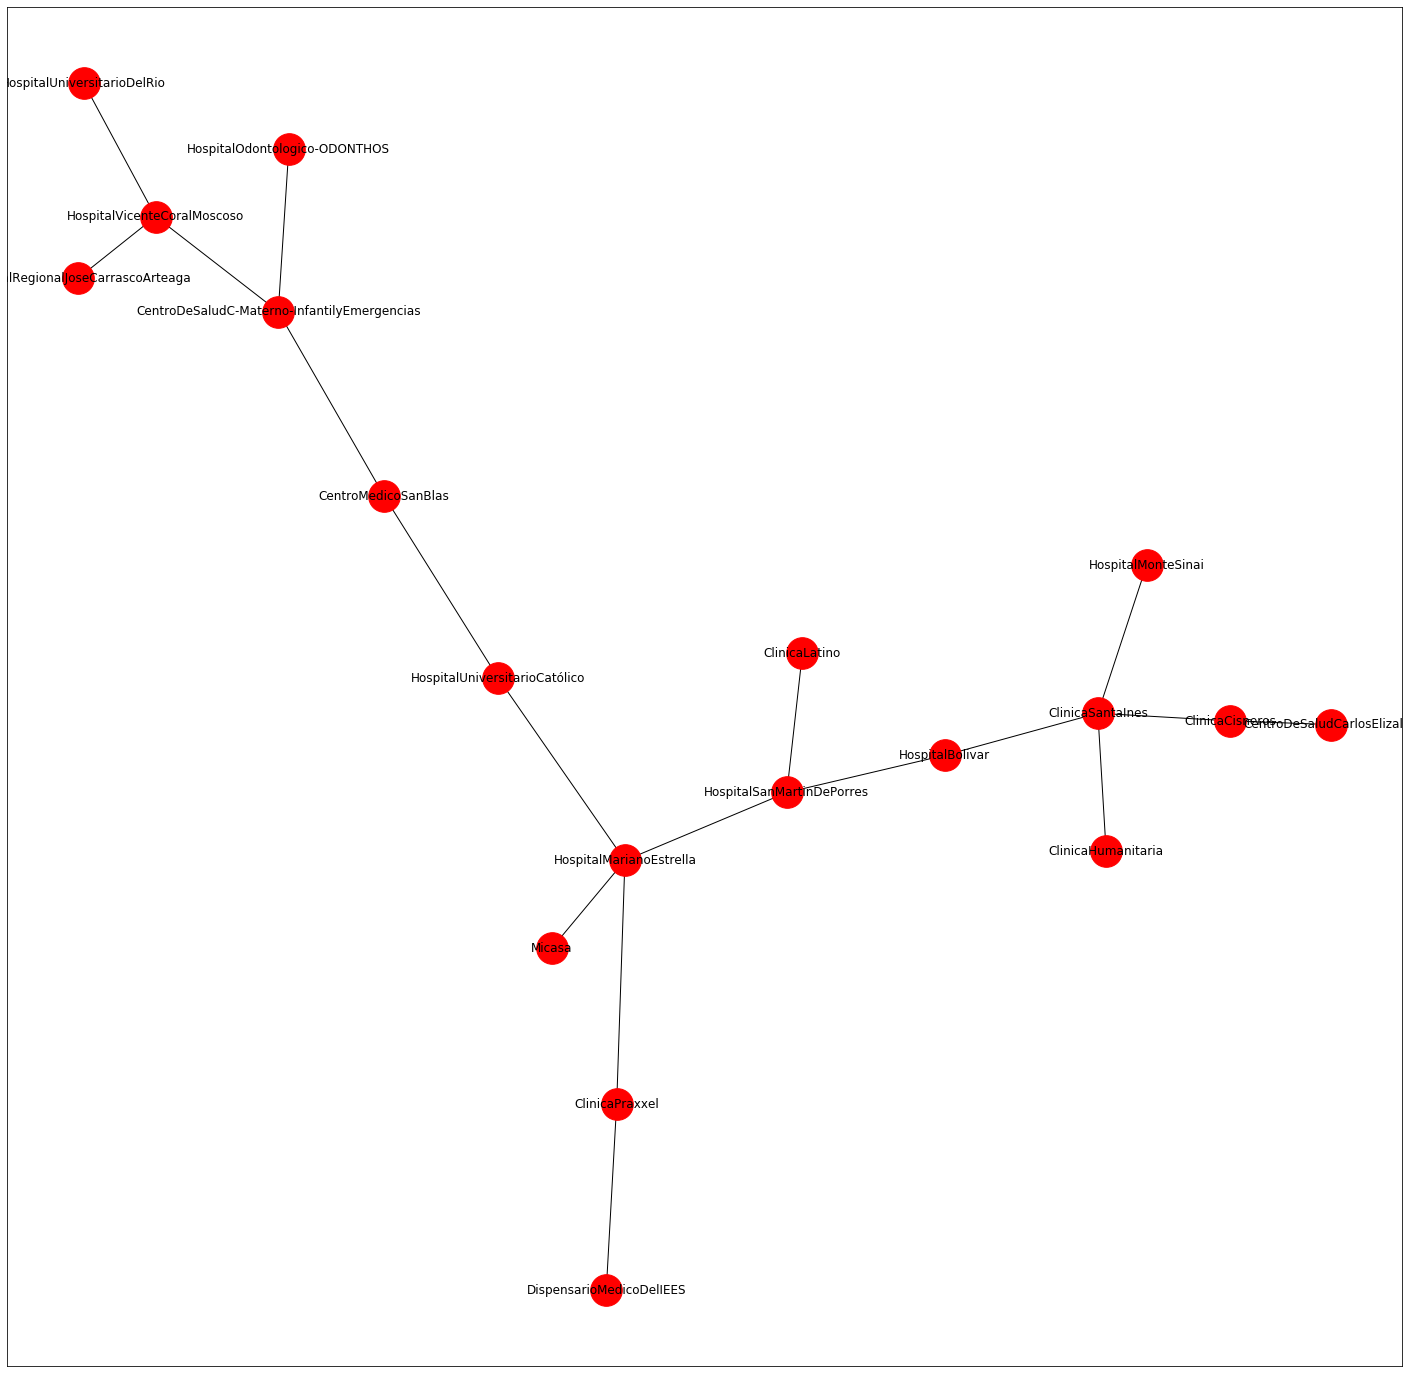

In [14]:

def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Micasa': {'HospitalMarianoEstrella'},
        'HospitalMarianoEstrella': {'Micasa','HospitalSanMartinDePorres', 'ClinicaPraxxel', 'HospitalUniversitarioCatólico'}, 
        'HospitalSanMartinDePorres': {'HospitalMarianoEstrella','ClinicaLatino','HospitalBolivar'}, 
        'ClinicaPraxxel':{'HospitalMarianoEstrella','DispensarioMedicoDelIEES'},
        'HospitalUniversitarioCatólico':{'HospitalMarianoEstrella','CentroMedicoSanBlas'},
        'ClinicaLatino': {'HospitalSanMartinDePorres'}, 
        'HospitalBolivar': {'HospitalSanMartinDePorres','ClinicaSantaInes'}, 
        'DispensarioMedicoDelIEES': {'ClinicaPraxxel'},  
        'CentroMedicoSanBlas': { 'HospitalUniversitarioCatólico', 'CentroDeSaludC-Materno-InfantilyEmergencias'},  
        'ClinicaSantaInes':{'HospitalBolivar','ClinicaHumanitaria','ClinicaCisneros','HospitalMonteSinai'},  
        'CentroDeSaludC-Materno-InfantilyEmergencias':{'CentroMedicoSanBlas','HospitalOdontologico-ODONTHOS','HospitalVicenteCoralMoscoso'}, 
        'ClinicaHumanitaria':{'ClinicaSantaInes'}, 
        'ClinicaCisneros':{'ClinicaSantaInes','CentroDeSaludCarlosElizalde'},  
        'HospitalMonteSinai':{'ClinicaSantaInes'},  
        'HospitalOdontologico-ODONTHOS':{'CentroDeSaludC-Materno-InfantilyEmergencias'}, 
        'HospitalVicenteCoralMoscoso':{'CentroDeSaludC-Materno-InfantilyEmergencias','HospitalUniversitarioDelRio','HospitalRegionalJoseCarrascoArteaga'}, 
        'CentroDeSaludCarlosElizalde':{'ClinicaCisneros'}, 
        'HospitalRegionalJoseCarrascoArteaga':{'HospitalVicenteCoralMoscoso'}, 
        'HospitalUniversitarioDelRio':{'HospitalVicenteCoralMoscoso'}
 
    } 
     

    init_state = 'Micasa'
    solution = 'HospitalRegionalJoseCarrascoArteaga'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar) 
        print("LA SOLUCION ES : \n")
        print(result)
    else:
        print("No hay solucion !!!!")


    Grafica = nx.Graph()  
    Grafica.add_nodes_from(connections) 
    for ciudad, listaCiudades in connections.items():
            for a in listaCiudades:  
                Grafica.add_edge(ciudad,a,size=250)

    plt.figure(3,figsize=(25,25)) 
    nx.draw_networkx(Grafica, node_color = 'red', with_label = True, node_size=1000)
    plt.show() 

    


3- Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.

1. FACTOR DE RAMIFICACION 

n = 19 

d = 6 

- FORMULA: 

n = ((b^(d+1))-1)/(b-1)

- REAMPLAZAMOS VALORES 

19 = ((b^(6+1))-1)/(6-1)

- PROCEDEMOS A DESPEJAR B, EN DONDE B QUEDARIA DE ESTA MANERA UNA VEZ DESPEJADA 

b = 1.32527  

- AHORA REMPLAZAMOS EN LA FORMULA 
19 = ((1.32527^(6+1))-1)/(1.32527-1)

- REALIZADO EL CALCULO NOS DA COMO RESULTADO LO SIGUIENTE: 

19=19 

EL FACTOR DE RAMIFICACION ES IGUAL A 1.32527 



2.ANALISIS DEL ALGORITMO EN TERMINOS DE COMPLETITUD 





# Conclusiones

- Se puede concluir que se ha llevado a cabo de manera satisfactoria esta practica de busqueda por amplitud, donde hemos podido obtener de manera correcta, las rutas apropadas para llegar de una ciudad a otra.  

- Hemos obtenido la ruta apropiada para llegar desde mi vivienda a un hospital utilizando tambien busqueda por amplitud. 
 
- Se ha realizado los graficos correspondientes de las cuidades del ecuador y las rutas de mi vivienda  hacia los hospitales mas cercanos